# Question

- Which major airline had the best on-time performance, based on domestic flights out of New York area airports in 2013.

- What does it mean when a flight says on time?
  - On-time - The percentage of completed flights that arrived at the gate on-time where on-time is defined as within (less than) 15 minutes of scheduled gate arrival time.
  
- What does it mean a airline is a major airline?
  - https://en.wikipedia.org/wiki/Major_airlines_of_the_United_States
  - For this study, A airline that has the most flights is the most major airline.
    

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
# %matplotlib qt
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)

In [2]:
# Load Data
df = pd.read_excel(r'C:\Users\amorn\Documents\yeshiva\workspace\DAV-6050\data\airline_performance.XLSX')

In [3]:
df.head(3)

,dep_time,sched_dep_time,arr_time,sched_arr_time,carrier,airline_name,origin,dest,airport_name
0,2013-01-01 05:17:00,2013-01-01 05:15:00,2013-01-01 08:30:00,2013-01-01 08:19:00,UA,United Air Lines Inc.,EWR,IAH,George Bush Intercontinental
1,2013-01-01 05:33:00,2013-01-01 05:29:00,2013-01-01 08:50:00,2013-01-01 08:30:00,UA,United Air Lines Inc.,LGA,IAH,George Bush Intercontinental
2,2013-01-01 05:42:00,2013-01-01 05:40:00,2013-01-01 09:23:00,2013-01-01 08:50:00,AA,American Airlines Inc.,JFK,MIA,Miami Intl


In [4]:
df.shape

(328063, 9)

In [5]:
df.columns

Index(['dep_time', 'sched_dep_time', 'arr_time', 'sched_arr_time', 'carrier',
       'airline_name', 'origin', 'dest', 'airport_name'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328063 entries, 0 to 328062
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   dep_time        328063 non-null  datetime64[ns]
 1   sched_dep_time  328063 non-null  datetime64[ns]
 2   arr_time        328063 non-null  datetime64[ns]
 3   sched_arr_time  328063 non-null  datetime64[ns]
 4   carrier         328063 non-null  object        
 5   airline_name    328063 non-null  object        
 6   origin          328063 non-null  object        
 7   dest            328063 non-null  object        
 8   airport_name    320503 non-null  object        
dtypes: datetime64[ns](4), object(5)
memory usage: 22.5+ MB


# Data Explore Analysis

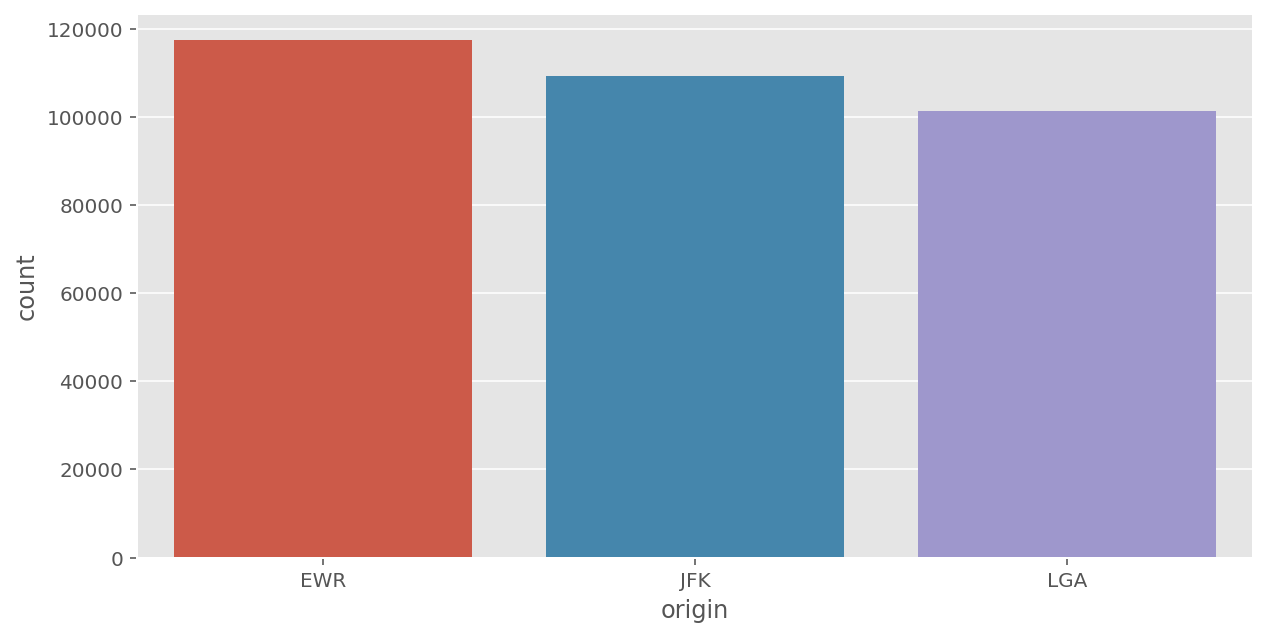

In [7]:
# To see the count of flights from origins
ax = sns.countplot(x="origin", data=df,
              order = df['origin'].value_counts().index)

The 3 origin are in New York area.

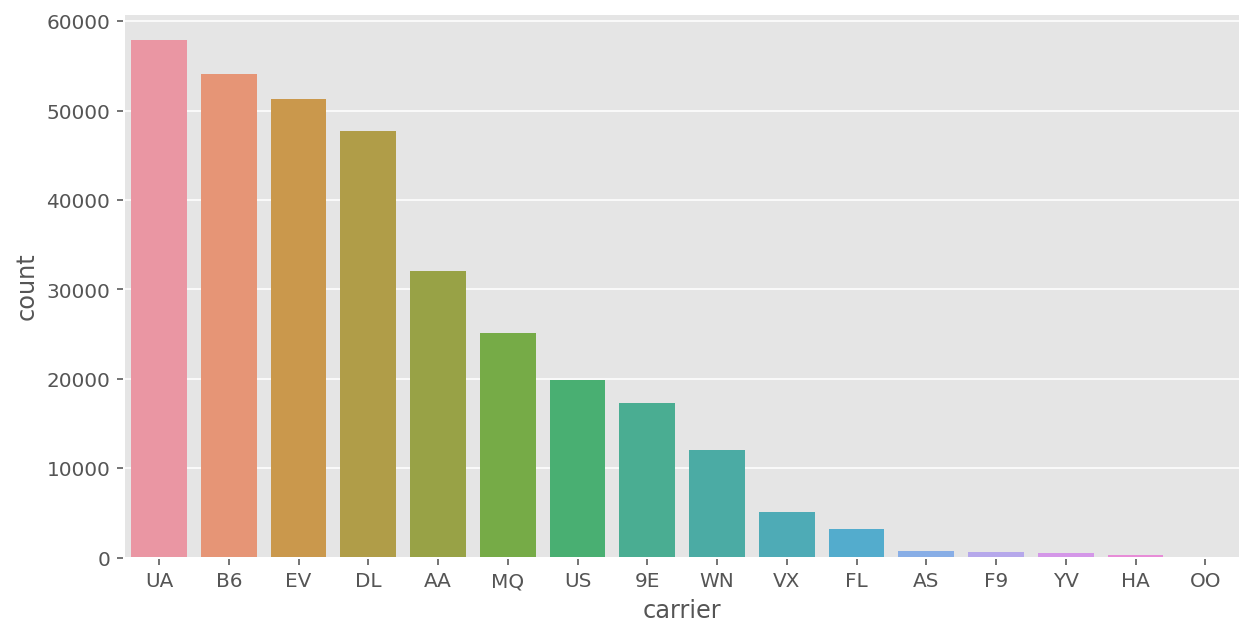

In [8]:
# To see the count of flights grouping by carriers
ax = sns.countplot(x="carrier", data=df,
              order = df['carrier'].value_counts().index)

# Data Preparation (Clean Data)
- To create a column. It is minutes that equals (arr_time - sched_arr_time)
  - For example, -10 means arrive in advance 10 minutes.
  
- To create a column. It is a flag (true/false) that means on time or not.

### To create a column. It is minutes that equals (arr_time - sched_arr_time)

In [56]:
# copy a new sub data set. Each flight has a different origin and dest, also has a different dep_time and arr_time.
delay_df = df[(df['origin'] != df['dest']) & (df['dep_time'] != df['arr_time'])].copy()

In [57]:
delay_df.shape

(328063, 9)

In [ ]:
# To create a column. It is minutes that equals (arr_time - sched_arr_time)
delay_df['ontime_minutes'] = delay_df['arr_time'] - delay_df['sched_arr_time']

In [34]:
delay_df.loc[:, ('ontime_minutes')] = delay_df['ontime_minutes'].astype('timedelta64[m]')

In [35]:
# To check
delay_df.head(3)

,dep_time,sched_dep_time,arr_time,sched_arr_time,carrier,airline_name,origin,dest,airport_name,ontime_minutes
0,2013-01-01 05:17:00,2013-01-01 05:15:00,2013-01-01 08:30:00,2013-01-01 08:19:00,UA,United Air Lines Inc.,EWR,IAH,George Bush Intercontinental,11.0
1,2013-01-01 05:33:00,2013-01-01 05:29:00,2013-01-01 08:50:00,2013-01-01 08:30:00,UA,United Air Lines Inc.,LGA,IAH,George Bush Intercontinental,20.0
2,2013-01-01 05:42:00,2013-01-01 05:40:00,2013-01-01 09:23:00,2013-01-01 08:50:00,AA,American Airlines Inc.,JFK,MIA,Miami Intl,33.0


### To create a column. It is a flag (true/false) that means on time or not.

In [36]:
# calculate the ontime flag
def cal_ontime_flag(ontime, x):
    '''
        if ontime < x, return 1.
        else return 0.
        
        For example: ontime = 20, x = 15, return 0
    '''
    return 1 if ontime < x else 0

delay_df['ontime_flag'] = delay_df.apply(lambda row: cal_ontime_flag(row['ontime_minutes'], 15), axis=1)

In [37]:
# To check
delay_df.head(3)

,dep_time,sched_dep_time,arr_time,sched_arr_time,carrier,airline_name,origin,dest,airport_name,ontime_minutes,ontime_flag
0,2013-01-01 05:17:00,2013-01-01 05:15:00,2013-01-01 08:30:00,2013-01-01 08:19:00,UA,United Air Lines Inc.,EWR,IAH,George Bush Intercontinental,11.0,1
1,2013-01-01 05:33:00,2013-01-01 05:29:00,2013-01-01 08:50:00,2013-01-01 08:30:00,UA,United Air Lines Inc.,LGA,IAH,George Bush Intercontinental,20.0,0
2,2013-01-01 05:42:00,2013-01-01 05:40:00,2013-01-01 09:23:00,2013-01-01 08:50:00,AA,American Airlines Inc.,JFK,MIA,Miami Intl,33.0,0


# Create Aggregation Table

In [38]:
delay_agg_df = delay_df.groupby('carrier').agg({'ontime_flag':'sum', 'arr_time':'count'}).rename(columns={"ontime_flag": "ontime_count", "arr_time": "flights_count"})

In [39]:
delay_agg_df.head(3)

,ontime_count,flights_count
carrier,,
9E,13121,17345
AA,26029,32059
AS,611,712


In [40]:
delay_agg_df['ontime_percentage'] = delay_agg_df['ontime_count']/delay_agg_df['flights_count'] * 100

In [41]:
delay_agg_df.head(3)

,ontime_count,flights_count,ontime_percentage
carrier,,,
9E,13121,17345,75.647161
AA,26029,32059,81.190929
AS,611,712,85.814607


In [42]:
delay_agg_df['flights_count_rank'] = delay_agg_df['flights_count'].rank(method='first',ascending=False)

In [43]:
delay_agg_df.head(3)

,ontime_count,flights_count,ontime_percentage,flights_count_rank
carrier,,,,
9E,13121,17345,75.647161,8.0
AA,26029,32059,81.190929,5.0
AS,611,712,85.814607,12.0


In [44]:
delay_agg_df['ontime_percentage_rank'] = delay_agg_df['ontime_percentage'].rank(method='first',ascending=False)

In [45]:
delay_agg_df.head(3)

,ontime_count,flights_count,ontime_percentage,flights_count_rank,ontime_percentage_rank
carrier,,,,,
9E,13121,17345,75.647161,8.0,10.0
AA,26029,32059,81.190929,5.0,6.0
AS,611,712,85.814607,12.0,2.0


In [46]:
delay_agg_df

,ontime_count,flights_count,ontime_percentage,flights_count_rank,ontime_percentage_rank
carrier,,,,,
9E,13121,17345,75.647161,8.0,10.0
AA,26029,32059,81.190929,5.0,6.0
AS,611,712,85.814607,12.0,2.0
B6,40985,54137,75.706079,2.0,9.0
DL,39143,47746,81.981737,4.0,4.0
EV,35991,51251,70.224971,3.0,13.0
F9,421,681,61.820852,13.0,16.0
FL,2133,3181,67.054385,11.0,15.0
HA,299,342,87.426901,15.0,1.0


In [47]:
delay_agg_df.reset_index(inplace=True)

In [48]:
delay_agg_df.head(3)

,carrier,ontime_count,flights_count,ontime_percentage,flights_count_rank,ontime_percentage_rank
0,9E,13121,17345,75.647161,8.0,10.0
1,AA,26029,32059,81.190929,5.0,6.0
2,AS,611,712,85.814607,12.0,2.0


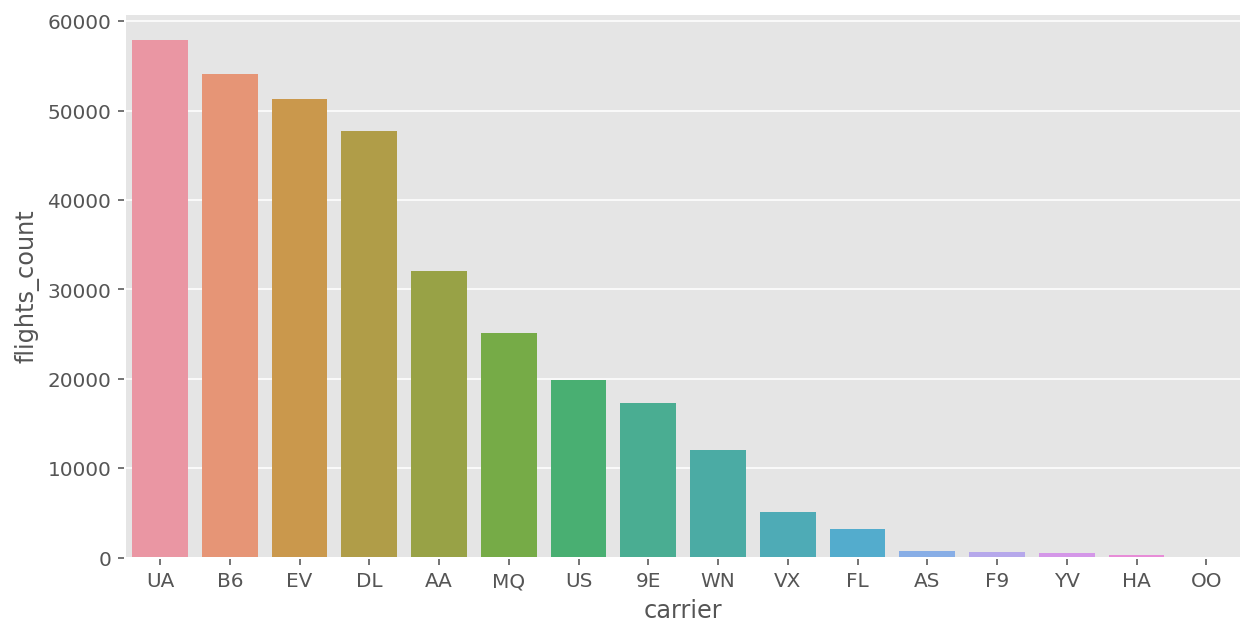

In [49]:
ax = sns.barplot(x="carrier", y="flights_count", data=delay_agg_df, 
                 order=delay_agg_df.sort_values('flights_count',ascending = False).carrier)

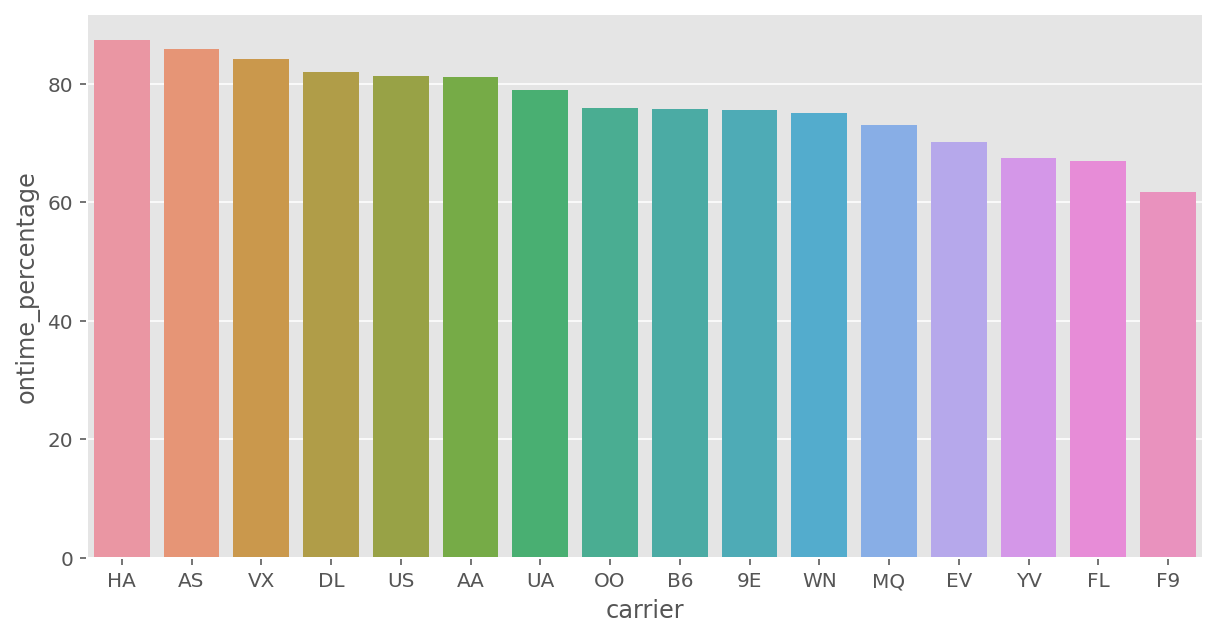

In [50]:
ax = sns.barplot(x="carrier", y="ontime_percentage", data=delay_agg_df, 
                 order=delay_agg_df.sort_values('ontime_percentage',ascending = False).carrier)

# Top N airlines by the number of flights which has the highest on-time percentage?

In [51]:
topN_df = delay_agg_df[delay_agg_df['flights_count_rank'] <= 7]

In [52]:
topN_df.sort_values('ontime_percentage_rank')

,carrier,ontime_count,flights_count,ontime_percentage,flights_count_rank,ontime_percentage_rank
4,DL,39143,47746,81.981737,4.0,4.0
12,US,16143,19842,81.357726,7.0,5.0
1,AA,26029,32059,81.190929,5.0,6.0
11,UA,45690,57916,78.890117,1.0,7.0
3,B6,40985,54137,75.706079,2.0,9.0
9,MQ,18315,25076,73.037965,6.0,12.0
5,EV,35991,51251,70.224971,3.0,13.0


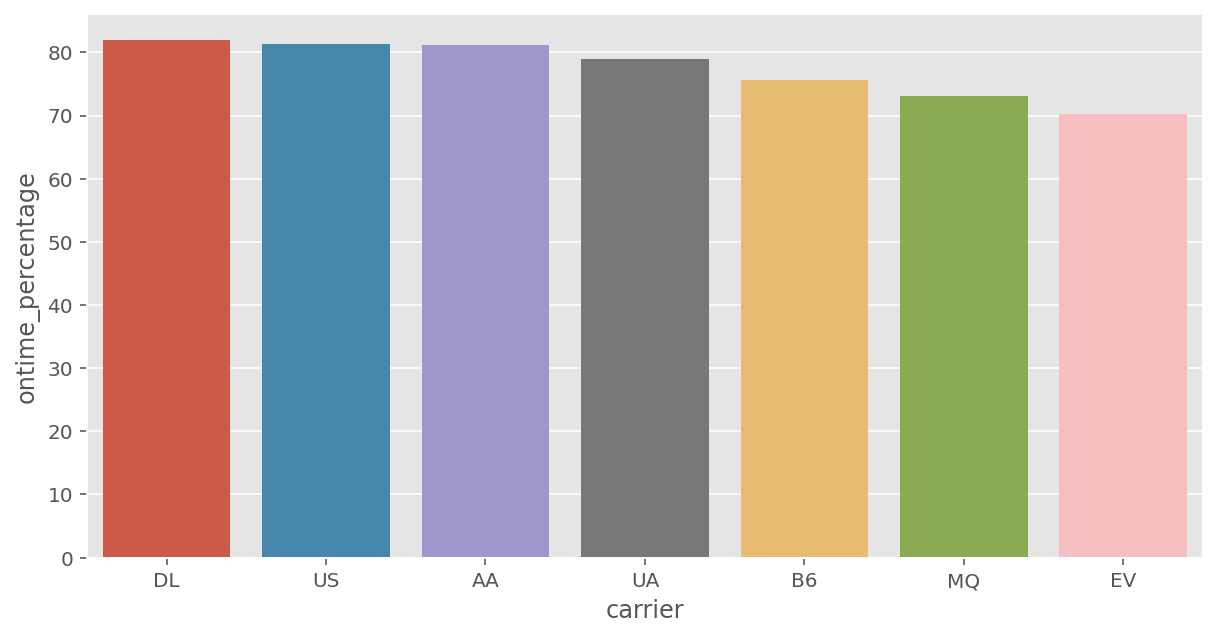

In [53]:
ax = sns.barplot(x="carrier", y="ontime_percentage", data=topN_df, 
                 order=topN_df.sort_values('ontime_percentage',ascending = False).carrier)

# Answer the Question
The DL has the highest on-time percentage in the major 7 airlines that have the highest number of flights.